<a href="https://www.kaggle.com/code/ishwor2048/beginner-friendly-titanic-eda-and-machine-learning?scriptVersionId=300905148" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1><b>Titanic Dataset Hands-on Data Overview, EDA and Classification Machine Learning</b></h1>

Hello Everyone, <br>
In this notebook, I have included most possible data overview, exploratory data analysis, data visualization, data pre-processing, machine learning life-cycle, and saving model locally. I hope you are going to learn a ton from this notebook. This notebook will be constantly updated, and this is just beginning, and I want learners to take the best advantage out of this notebook and analysis. so please do not forget to check the most updated one next time as I am updating this notebook frequently with additional analysis, visualization, comments and models based on the viewers comments!<br><br>
**If you want to  learn something specific, please feel free to COMMENT, I will provide in-depth deep dive into it. Also, if you liked my work on this, please hit UPVOTE, so that it will reach more learners.** <br><br>
For better practice, I will be using training data, and split to validation set to provide full practice of data preprocessing, but in the titanic specific data, we do not need to perform train-test split which I have used in order to do the submission to Kaggle.
<br><br>
Please also do not forget to check my YouTube channel as I am constructing hands-on tutorial from this notebook, and this will be updated there:
https://www.youtube.com/@DataSpeaks4u

<h1><b>Basic Imports

Let's begin our project with importing necessary libraries and modules. Working with python is really powerful for Data Science projects with very powerful libraries, modules and frameworks that will help you with not having to write code from scratch to accomplish specific tasks, including data visualization, exploratory data analysis, machine learning and deployments. Please go through the imports below, and let me know in comments if you got any questions.

In [1]:
# =============================
# Core data and computation libs
# =============================
import numpy as np  # NumPy: fundamental package for fast numerical computing (arrays, random numbers, linear algebra)
import pandas as pd  # pandas: tabular data structures (DataFrame/Series) for data loading, cleaning, joins, and EDA

# =============================
# Visualization libraries
# =============================
import matplotlib.pyplot as plt  # Matplotlib (stateful pyplot API): low-level plotting, figure/axes control
import seaborn as sns  # Seaborn: higher-level statistical plots with nicer defaults; built on top of Matplotlib

# ===============================================================
# scikit-learn utilities: data split, preprocessing, and pipelines
# ===============================================================
# Train/validation/test splitting (train_test_split),
# StratifiedKFold for balanced class distributions across folds during CV,
# and GridSearchCV for exhaustive hyperparameter search with cross-validation.
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

# ColumnTransformer lets you apply different preprocessing to different column subsets
# (e.g., numeric vs categorical pipelines).
from sklearn.compose import ColumnTransformer

# Pipeline chains preprocessing steps and estimator into a single object
# to ensure no data leakage and consistent application during fit/predict.
from sklearn.pipeline import Pipeline

# Common preprocessing transformers:
# - OneHotEncoder: convert categorical features to one-hot/dummy variables.
# - StandardScaler: standardize numeric features (mean=0, std=1), critical for distance-based or linear-margin models.
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# SimpleImputer: handle missing values (e.g., strategy='mean' for numeric, 'most_frequent' for categorical).
from sklearn.impute import SimpleImputer

# =======================
# scikit-learn classifiers
# =======================
# Decision Tree: non-linear, interpretable, prone to overfitting if not regularized (max_depth, min_samples_split, etc.).
from sklearn.tree import DecisionTreeClassifier

# Random Forest: ensemble of trees; reduces variance; good baseline for tabular data; handles mixed feature types well.
from sklearn.ensemble import RandomForestClassifier

# K-Nearest Neighbors: instance-based learner; sensitive to scale (hence StandardScaler); choose k via CV.
from sklearn.neighbors import KNeighborsClassifier

# Support Vector Classifier: effective in high-dimensional spaces; sensitive to feature scaling; kernels (linear/RBF/poly).
from sklearn.svm import SVC

# ==============================
# Metrics and diagnostic utilities
# ==============================
from sklearn.metrics import (
    accuracy_score,              # Overall fraction of correct predictions (may be misleading with class imbalance).
    precision_score,             # Of predicted positives, how many are correct (TP / (TP + FP)).
    recall_score,                # Of actual positives, how many were found (TP / (TP + FN)).
    f1_score,                    # Harmonic mean of precision and recall; balances both for imbalanced classes.
    roc_auc_score,               # Area under ROC curve; threshold-independent measure (binary & probability-based).
    classification_report,       # Nicely formatted precision/recall/F1/support per class.
    confusion_matrix,            # 2x2 (binary) or CxC (multi-class) matrix of predicted vs actual counts.
    RocCurveDisplay,             # Helper to plot ROC curve (TPR vs FPR across thresholds).
    PrecisionRecallDisplay       # Helper to plot Precision-Recall curve (especially informative on imbalanced data).
)

# =======================
# Persistence / I/O helper
# =======================
import joblib  # For saving/loading trained models, pipelines, and preprocessors efficiently (pickle-compatible).

# =======================
# Reproducibility controls
# =======================
RANDOM_STATE = 42  # Fixed seed value used wherever estimators/splitters accept random_state for reproducible results.
np.random.seed(RANDOM_STATE)  # Also seed NumPy's RNG when generating synthetic data or random operations outside sklearn.

# =======================
# Sanity message
# =======================
# Basic confirmation that the imports executed without error.
# Useful in notebooks or scripts to ensure environment dependencies are satisfied before proceeding.
print("Imports loaded!🤖")

Imports loaded!🤖


<h3><b>Load the data (Kaggle Built-in Titanic Dataset)

Before loading here, it is important that we load the data into the "INPUT" section to the right panel

In [2]:
train_path = "/kaggle/input/competitions/titanic/train.csv" # These paths can be copied from the data path on right side "Competitions" panel
test_path = "/kaggle/input/competitions/titanic/test.csv" # this is the test data which will be used to evaluate model's performances

<h3><b>Loading the training dataset from the path defined above, and naming it to "df"

In [3]:
# define the df
df = pd.read_csv(train_path) # calling train dataset to be the df

In [4]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset.") # check number of rows and columns in the dataset

There are 891 rows and 12 columns in the dataset.


<h2><b>Quick Overviews of the Data

Understanding data is crucial part of any Data Science and Machine Learning project. Getting quick overview of the data can help us to build foundation for the data understanding. Let's begin small!

df.head() is popular technique to get the top (first) 5 rows of the data. if you just say "df.head()", default rows that are output are 5, but you can change inside the open and close paranthesis, provide any number of rows you like to get, i.e. <code>df.head(2)</code> or <code>df.head(10)</code>.

In [5]:
# getting the top 5 rows of the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Getting top 3 rows of the dataset
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [7]:
df.head(10) # Looking at the top 10 records from the training dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Understanding last few rows may give us a bit better understanding about the data, how does it look like towards the last.

In [8]:
# Getting last 5 rows of the dataset
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
# Getting last 7 rows of the training dataset
df.tail(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q


Looking at the very first few rows or last rows is good idea to get good understanding of the data, however, it is sometimes not sufficient to get full picture of the dataset. If you see the randomly picked up few rows, this will give you much better picture of the dataset while this is going to be much representative. 

.sample() function lets you choose whatever number of randomply picked up rows you want to view, and display the value for you. Every time you run the code, different rows will be picked up. Let's view some randomly picked up rows below:

In [10]:
# Getting sample 5 rows of the dataset. This function will pick the random 5 rows. Notice the index positions
df.sample(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C


NOTICE THE INDEX POSITIONS OF EACH RECORDS, THEY ARE RANDOM, NOT IN A SEQUENCE.

In [11]:
df.sample(3) # Let's look at the random 3 records from the training dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
384,385,0,3,"Plotcharsky, Mr. Vasil",male,NaN,0,0,349227,7.8958,NaN,S
210,211,0,3,"Ali, Mr. Ahmed",male,24.0,0,0,SOTON/O.Q. 3101311,7.0500,NaN,S
486,487,1,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35.0,1,0,19943,90.0000,C93,S


In [12]:
df.sample(10) # Also, let's pick random 10 records from the dataset and display belo

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
254,255,0,3,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",female,41.0,0,2,370129,20.2125,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
777,778,1,3,"Emanuel, Miss. Virginia Ethel",female,5.0,0,0,364516,12.4750,NaN,S
436,437,0,3,"Ford, Miss. Doolina Margaret ""Daisy""",female,21.0,2,2,W./C. 6608,34.3750,NaN,S
635,636,1,2,"Davis, Miss. Mary",female,28.0,0,0,237668,13.0000,NaN,S
748,749,0,1,"Marvin, Mr. Daniel Warner",male,19.0,1,0,113773,53.1000,D30,S
701,702,1,1,"Silverthorne, Mr. Spencer Victor",male,35.0,0,0,PC 17475,26.2875,E24,S
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
73,74,0,3,"Chronopoulos, Mr. Apostolos",male,26.0,1,0,2680,14.4542,NaN,C
650,651,0,3,"Mitkoff, Mr. Mito",male,NaN,0,0,349221,7.8958,NaN,S


Looking at the first few rows are great!! But this is not complete picture of the data. We need ways to look at the data by type of data, if there are any missing rows on each columns, what are the data types in each columns are the few ways to understand better picture of the dataset. Let's have a look at them.

In [13]:
# Checking information about the data in overall
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<h3><b>Statistical Summary of Numerical and Categorical Columns

<b>Statistical Summary of Numerical Features</b>
While looking at the first few rows gives us a feel for the data, we need descriptive statistics to understand the distribution, spread, and scale of our numerical variables.

We use the .describe() function, which automatically calculates the following for every numerical column:

- Count: The number of non-missing values (helps identify empty cells).
- Mean: The average value.
- Std (Standard Deviation): How spread out the data is (high value = high variability).
- Min/Max: The range of the data.
- 25%, 50%, 75% (Percentiles): Helps us understand the distribution and detect outliers. The 50% mark is the Median.

<b>Pro Tip<b>: <br>We often add .T (Transpose) at the end. This flips the table so that features are rows and statistics are columns, making it much easier to read when you have many columns!

In [14]:
# Getting quick statistical summary of the numerical columns. Dot T here transposes the rows to columns and columns to rows
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


<h4><b>📊 Analysis: Numerical Feature Insights</b></h4>
<div style="background-color: rgba(76, 175, 80, 0.1); padding: 20px; border-radius: 10px; border-left: 5px solid #4CAF50;">
<p>The <b>.describe().T</b> output provides the statistical "skeleton" of our dataset. Here are the key takeaways from the numerical distributions:</p>

<ul>
    <li><b>Survival Rate (Survived):</b> 
        The mean for <code>Survived</code> is <b>0.384</b>. This tells us that approximately <b>38.4%</b> of the passengers in the training set survived, while the majority (61.6%) did not.
    </li>
    <li><b>Passenger Class (Pclass):</b> 
        The average class is <b>2.3</b>, and the 50% (median) mark is <b>3</b>. This suggests that more than half of the passengers were traveling in 3rd Class, indicating a dataset skewed toward lower-fare tickets.
    </li>
    <li><b>Age Distribution & Missing Values:</b> 
        The <code>count</code> for <code>Age</code> is <b>714</b> (compared to 891 total). This confirms that <b>177 ages are missing</b>. The passengers ranged from infants (<b>0.42 years</b>) to a senior of <b>80 years</b>, with the average passenger being around <b>30 years old</b>.
    </li>
    <li><b>Fare Skewness:</b> 
        The <code>Fare</code> column shows massive variance. While the median fare was only <b>14.45</b>, the maximum was <b>512.33</b>. Since the <code>std</code> (49.69) is higher than the <code>mean</code> (32.20), we know the data is highly skewed by expensive 1st-class tickets.
    </li>
    <li><b>Family Dynamics (SibSp & Parch):</b> 
        The median for both <code>SibSp</code> (siblings/spouses) and <code>Parch</code> (parents/children) is <b>0</b>. This indicates that <b>at least 50% of passengers were traveling alone</b>. However, some large families were present, with a maximum of 8 siblings/spouses.
    </li>
</ul>
</div>

💡 Beginner Tip: Notice the difference between the Mean and the 50% (Median). In the Fare column, the Mean (32) is much higher than the Median (14). This is a classic sign of outliers—a few people paid very high prices, pulling the average up!


<h4><b>Statistical Summary of Categorical (Text) Features</b></h4><br>
Not all data can be averaged! For columns containing text or categories (objects), we use include="object" to see a different set of metrics that help us understand the "classes" within our data.

<u>This summary provides:</u>
- Count: Number of non-null entries.
- Unique: The number of distinct categories (e.g., for Sex, this should be 2: 'male' and 'female').
- Top: The most frequently occurring category (the Mode).
- Freq: How many times that "Top" category appears.

<b>Why this helps<b>: This is the easiest way to spot cardinality issues (like a 'Name' column having too many unique values to be useful) or imbalance (like seeing if 90% of passengers embarked from the same port).

In [15]:
# Getting statistical summary of categorical columns
df.describe(include="object").T

,count,unique,top,freq
Name,891,891,"Dooley, Mr. Patrick",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,G6,4
Embarked,889,3,S,644


<div style="background-color: rgba(50, 150, 255, 0.1); padding: 20px; border-radius: 10px; border-left: 5px solid #2196F3;">
<p>This summary provides a high-level view of our non-numeric data. Here is what we can observe from the <b>.describe(include="object")</b> output:</p>

<ul>
    <li><b>High Cardinality (Name & Ticket):</b> 
        The <code>Name</code> column has 891 unique values (one for every row), and <code>Ticket</code> has 681. These are "high cardinality" features. We cannot use them directly in a model, but we can <i>engineer</i> them (e.g., extracting Titles like "Mr." or "Miss").
    </li>
    <li><b>Gender Distribution (Sex):</b> 
        There are 2 unique values, with <b>male</b> being the most frequent (<code>top</code>). It appears 577 out of 891 passengers (approx. 65%) were male.
    </li>
    <li><b>Missing Data Alert (Cabin):</b> 
        While there are 891 total rows, <code>Cabin</code> only has a <code>count</code> of 204. This means over <b>77% of the data is missing</b> for this column. We will need to decide whether to drop it or extract the "Deck" letter.
    </li>
    <li><b>Embarkation Points (Embarked):</b> 
        There are 3 unique ports. The most common is <b>S</b> (Southampton), appearing 644 times. Since only 2 values are missing (889 vs 891), this will be easy to impute using the <code>mode</code>.
    </li>
</ul>

In [16]:
# Checking list of columns
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

<ul>
<li><b>isnull():</b> Scans every cell to see if it is empty (NaN).</li>
<li><b>sum():</b> Adds up all the "True" (missing) values for each column.</li>
</ul>

In [17]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<h3><b>Quick EDA for Sanity Check

<b>⚖️ Target Variable Balance Check</b>
<ul>
<li><b>value_counts(normalize=True):</b> Converts raw counts into proportions (decimals).</li>
<li><b>* 100:</b> Turns those proportions into percentages for easier reading.</li>
<li><b>round(..., 2):</b> Cleans up the output to 2 decimal places.</li>
</ul>

In [18]:
# Checking balance of the labels
round(df["Survived"].value_counts(normalize=True) * 100, 2)

Survived
0    61.62
1    38.38
Name: proportion, dtype: float64

In [19]:
# Checking top missing values
df.isna().mean().sort_values(ascending=False).head(10)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
Sex            0.000000
Parch          0.000000
SibSp          0.000000
dtype: float64

<b>🔗 Numerical Correlation Analysis</b>
<ul>
<li><b>select_dtypes(include=[np.number]):</b> Automatically filters the data to keep only numerical columns, skipping text like Names or Sex.</li>
<li><b>.corr():</b> Calculates the Pearson correlation coefficient (ranging from -1 to +1).</li>
<li><b>numeric_only=True:</b> A safety parameter to ensure the function only processes numbers.</li>
</ul>

Note: We often look for high correlations between features (Multicollinearity). For example, if <b>Pclass</b> and <b>Fare</b> are too highly correlated, they might be telling the model the same thing twice!

In [20]:
# Quick correlation check for numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns

corr = round(df[num_cols].corr(numeric_only=True), 4)
display(corr)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.0000,-0.0050,-0.0351,0.0368,-0.0575,-0.0017,0.0127
Survived,-0.0050,1.0000,-0.3385,-0.0772,-0.0353,0.0816,0.2573
Pclass,-0.0351,-0.3385,1.0000,-0.3692,0.0831,0.0184,-0.5495
Age,0.0368,-0.0772,-0.3692,1.0000,-0.3082,-0.1891,0.0961
SibSp,-0.0575,-0.0353,0.0831,-0.3082,1.0000,0.4148,0.1597
Parch,-0.0017,0.0816,0.0184,-0.1891,0.4148,1.0000,0.2162
Fare,0.0127,0.2573,-0.5495,0.0961,0.1597,0.2162,1.0000


<h3><b>Data Visualization for additional data exploration

<ul>
<li><b>Color Scale:</b> Dark Red indicates a strong <b>Positive Correlation</b>, while Dark Blue indicates a strong <b>Negative Correlation</b>.</li>
<li><b>The Goal:</b> We look for features that have a high correlation with "Survived" (our target) and check for <b>Multicollinearity</b> (when two input features are too similar).</li>
</ul>

In [21]:
import plotly.express as px

# Creating an interactive heatmap
fig = px.imshow(corr, 
                text_auto='.2f', 
                aspect="auto", 
                color_continuous_scale='RdBu_r',
                title="Interactive Correlation Matrix (Plotly)")

# Enhancing the layout
#fig.update_layout(width=800, height=600)
fig.show()

<b>🌡️ Survival Correlation Analysis (Plotly)</b>
<ul>
<li><b>Why it’s important:</b> It helps us identify <b>Feature Importance</b> (which variables actually matter) and <b>Redundancy</b> (if two variables provide the same information, which can confuse the model).</li>
<li><b>Positive Correlation (Red):</b> As one value increases, the other tends to increase (e.g., higher <b>Fare</b> often correlates with higher <b>Survival</b>).</li>
<li><b>Negative Correlation (Blue):</b> As one value increases, the other decreases (e.g., as <b>Pclass</b> increases from 1 to 3, the <b>Survival</b> rate drops significantly).</li>
</ul>

In [22]:
# # Correlation heatmap if you want non-interactive one
# plt.figure(figsize=(10, 6))
# sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
# plt.title("Feature Correlation Heatmap")
# plt.show()

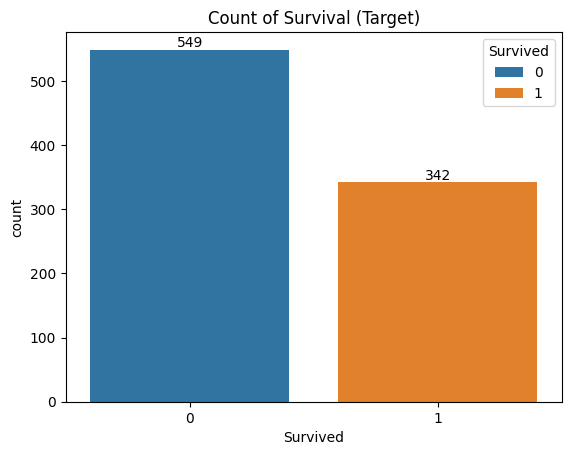

In [23]:
# Visualizing the survival vs non-survival
ax = sns.countplot(x='Survived', data=df, hue='Survived')
plt.title("Count of Survival (Target)")

for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [24]:
# categorical pivot table: Survival based on gender
round(df[["Sex", "Survived"]].groupby(['Sex']).mean(), 3)

,Survived
Sex,
female,0.742
male,0.189


In [25]:
# categorical pivot table: Survival rate by Passenger class
round(df[["Pclass", "Survived"]].groupby(['Pclass']).mean(), 3)

,Survived
Pclass,
1,0.630
2,0.473
3,0.242


Text(0.5, 1.0, 'Age density Distribution by Survival')

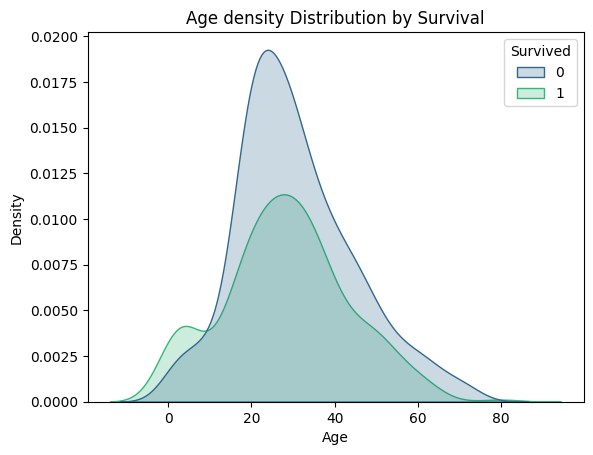

In [26]:
# Age distribution by survival (KDE PLOT)
sns.kdeplot(data=df, x='Age', hue='Survived', fill=True, palette='viridis')
plt.title("Age density Distribution by Survival")

Text(0.5, 1.0, 'Relationship between Age, Fare and Survival')

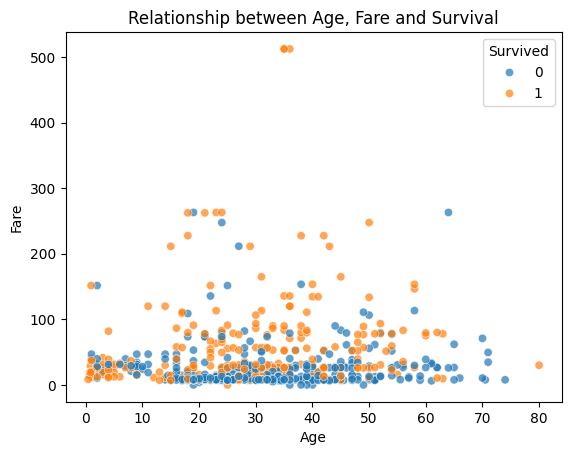

In [27]:
# fair vs age vs survival scatter plot
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', alpha=0.7)
plt.title("Relationship between Age, Fare and Survival")

Text(0.5, 1.0, 'Survival Rate by Family Size')

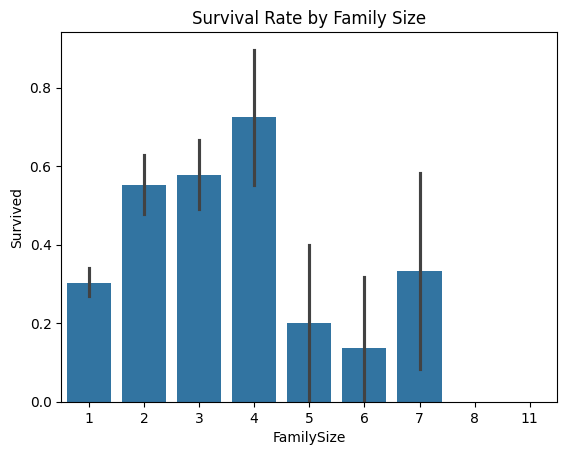

In [28]:
# survival rate by family size
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
sns.barplot(data=df, x = 'FamilySize', y = 'Survived')
plt.title("Survival Rate by Family Size")

Text(0.5, 1.0, 'Survival Probability: Sex vs Pclass')

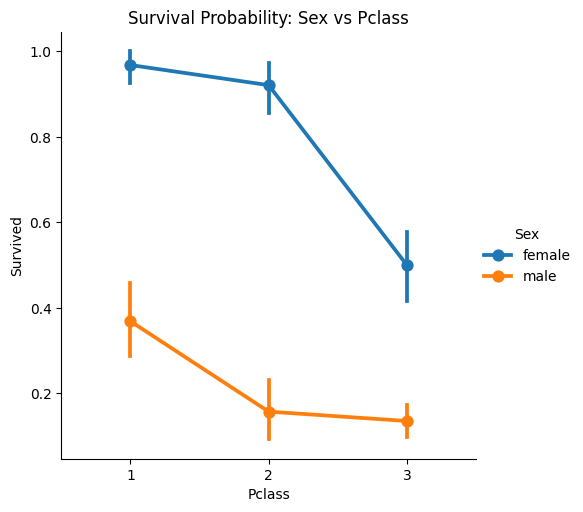

In [29]:
# Passenger class and sex interaction (catplot)
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df, kind='point')
plt.title("Survival Probability: Sex vs Pclass")

Text(0.5, 1.0, 'Surval by Port of Embarkation and Class')

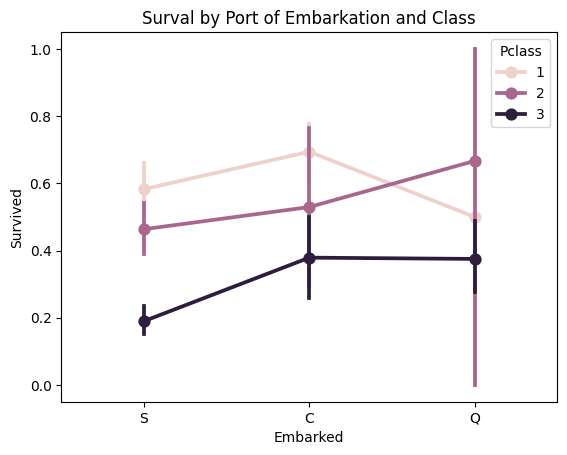

In [30]:
# Embarked port vs Survival vs. Pclass
sns.pointplot(data=df, x='Embarked', y='Survived', hue='Pclass')
plt.title("Surval by Port of Embarkation and Class")

Text(0.5, 1.0, 'Fair Distribution across classes')

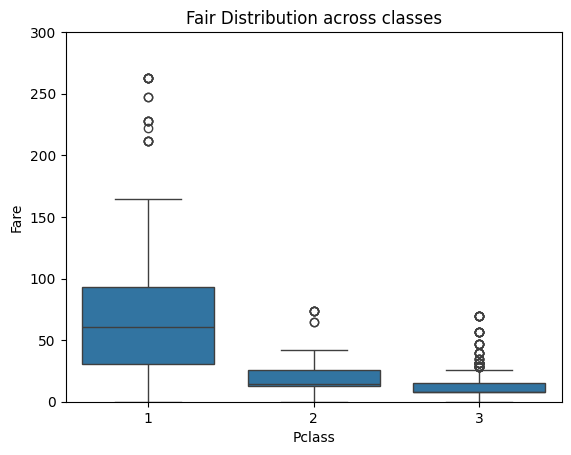

In [31]:
# Fair distribution by class
sns.boxplot(data=df, x = 'Pclass', y = 'Fare')
plt.ylim(0, 300) # Zoom in to ignore extreme outliers for better view
plt.title("Fair Distribution across classes")

Text(0.5, 1.0, 'Missing data Gap')

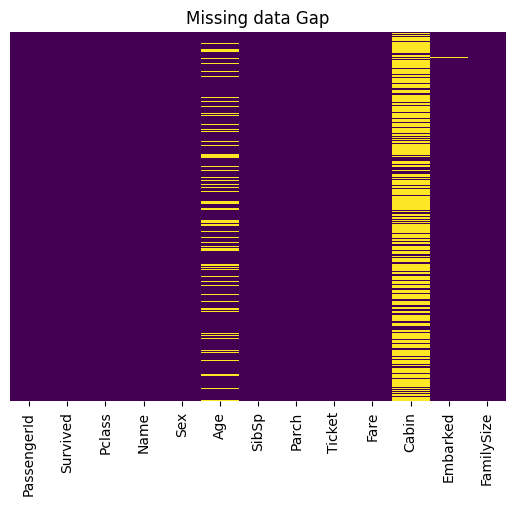

In [32]:
# missing value matrix
# Visualize the "emptiness" of the data 
# to see if Age or Cabin missigness is random or clustered
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Missing data Gap")

This combines a boxplot and KDE. It’s great for seeing if the age distribution of survivors in 1st class differs from 3rd class.

Text(0.5, 1.0, 'Age/Class Distribution by Surivival')

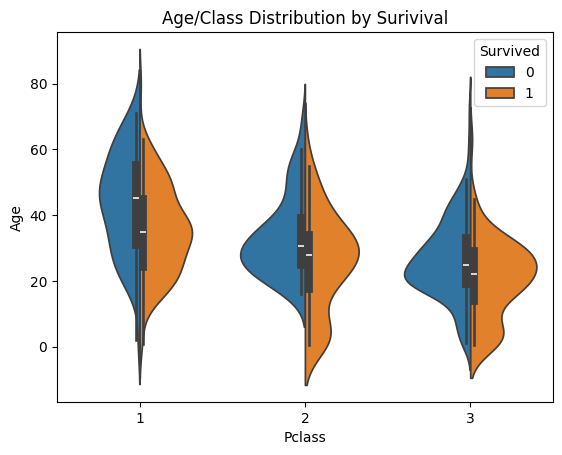

In [33]:
# Violin plot of Age by Passenger class and Survived
sns.violinplot(data=df, x="Pclass", y='Age', hue="Survived", split=True)
plt.title("Age/Class Distribution by Surivival")

You can extract titles (Mr, Mrs, Miss, Master, Dr) from the Name column. Visualizing survival by "Title" often reveals more than "Sex" alone (e.g., "Master" usually refers to young boys).

Text(0.5, 1.0, 'Survival Count by Title')

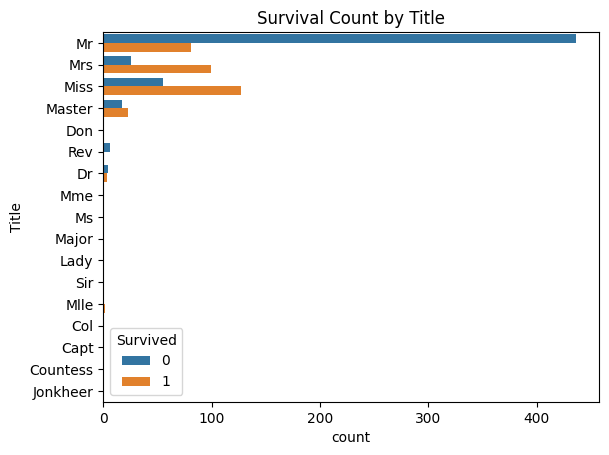

In [34]:
# Title extraction Analysis
# We can extract the title (Mr, Mrs, Miss, Master, Dr) from the Name column.
# Visualizing survival by "Title" often reveals more than "Sex" alone (e.g. Master usually refers to young boys)
df["Title"] = df["Name"].str.extract(r" ([A-Za-z]+)\.", expand=False)
sns.countplot(data=df, y='Title', hue="Survived")
plt.title("Survival Count by Title")

A bird's-eye view of all numerical relationships at once.

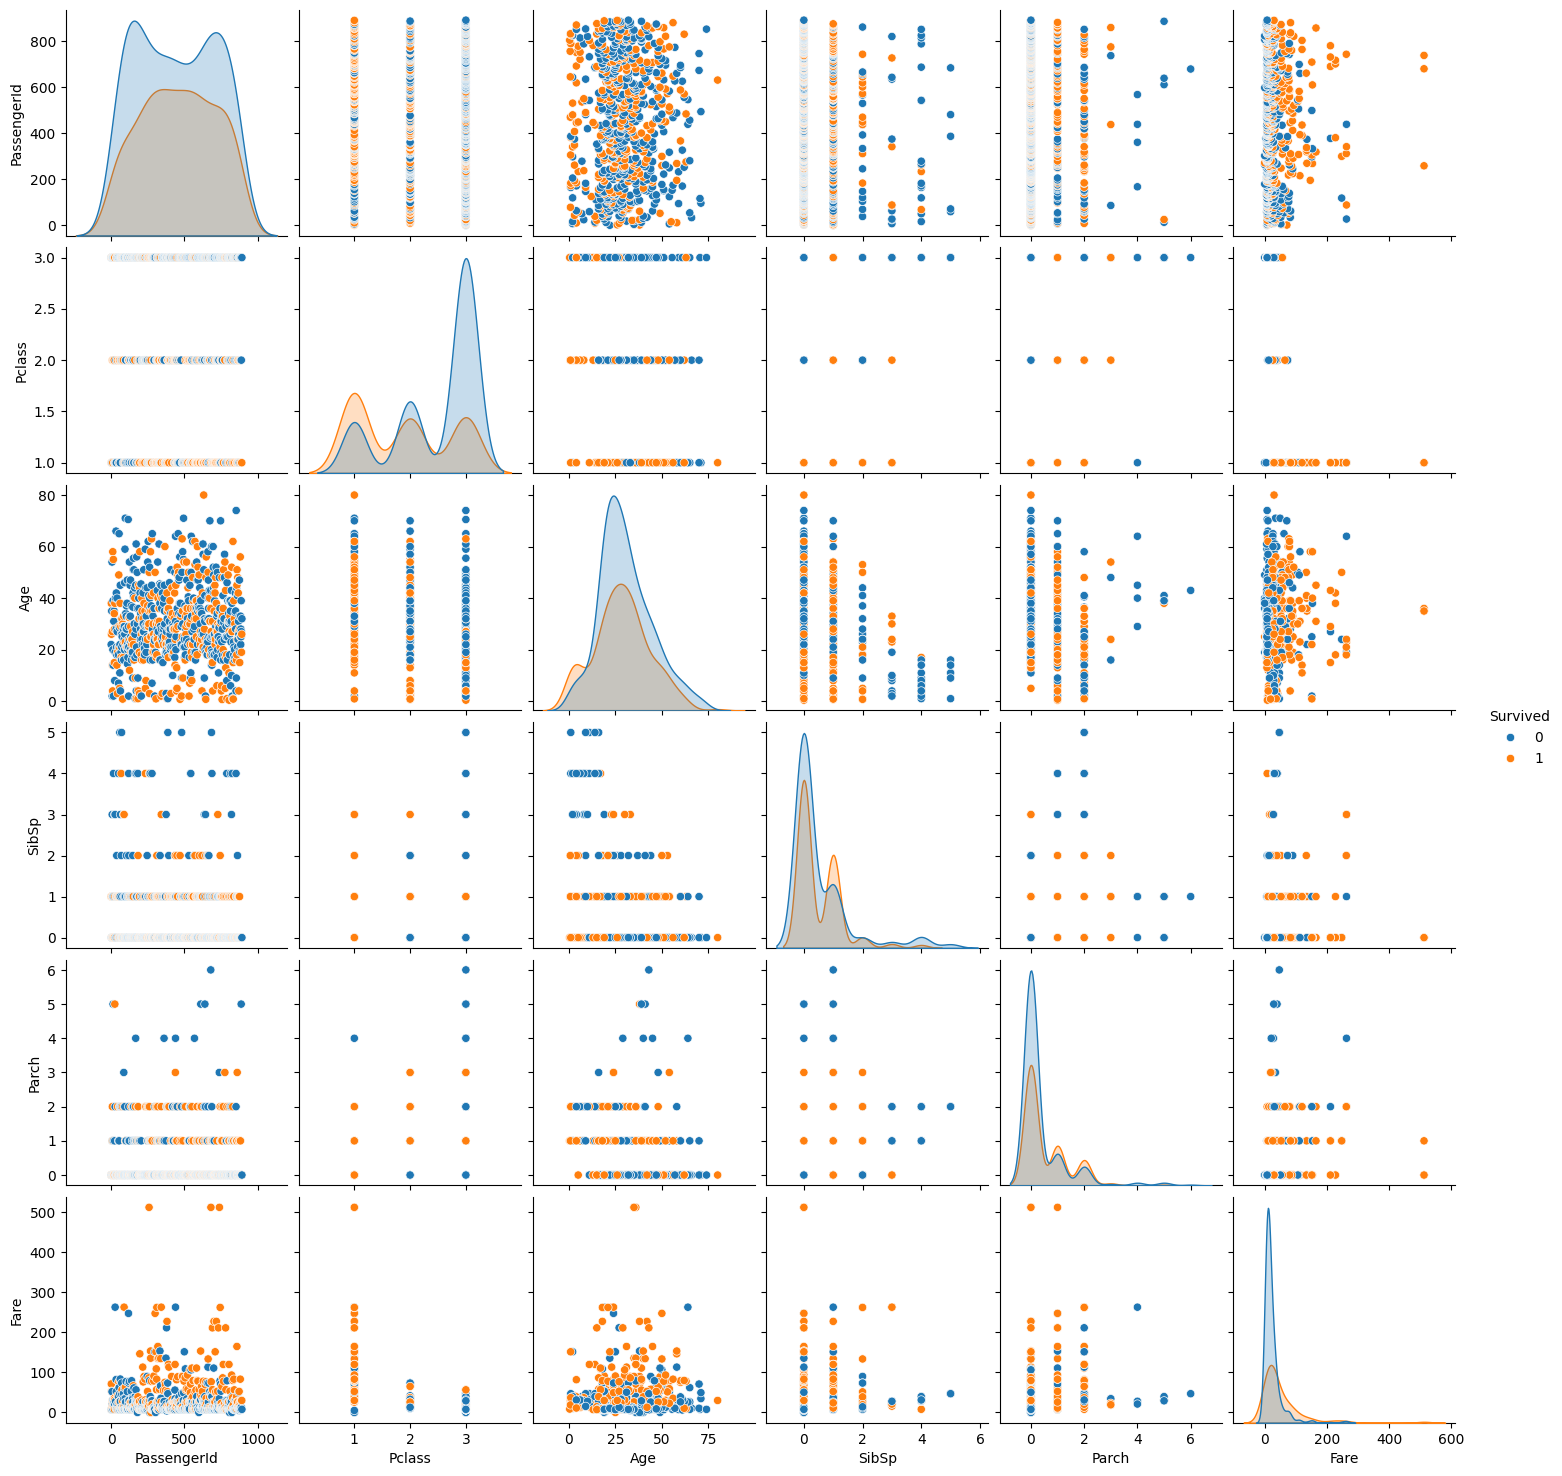

In [35]:
# Pairplot of numerical features
sns.pairplot(df[num_cols].dropna(), hue="Survived", diag_kind='kde')

Standard analysis looks at individuals. However, families on the Titanic often lived or died together. You can identify groups by looking for people with the same Surname and Ticket number.

Text(0.5, 1.0, 'Survival Consistency within Family Groups')

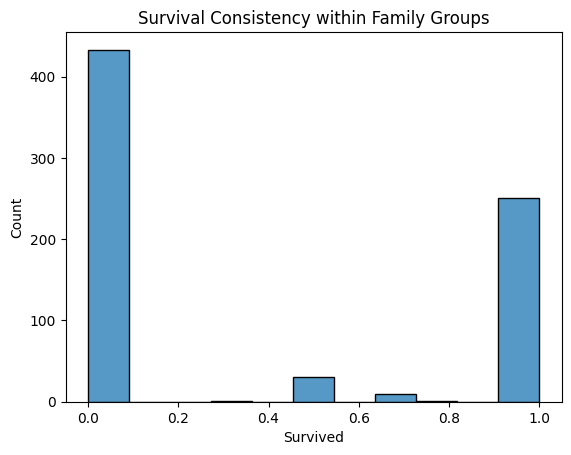

In [36]:
# Extract Surname
df['Surname'] = df['Name'].apply(lambda x: x.split(',')[0])

# Create a 'FamilyGroup' identifier
df['FamilyGroup'] = df['Surname'] + "_" + df['Ticket'].str[:-1]

# Find survival rates of these groups
group_survival = df.groupby('FamilyGroup')['Survived'].mean()
sns.histplot(group_survival)
plt.title("Survival Consistency within Family Groups")

The Cabin column is 77% null, so most people drop it. However, the Letter in the cabin (A, B, C, D, E, F, G, T) represents the Deck. Decks closer to the water line had lower survival rates.

Text(0.5, 1.0, 'Survival Rate by Ship Deck (Vertical Location)')

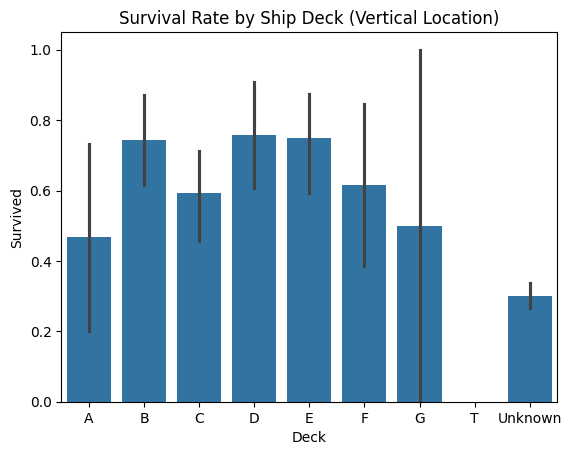

In [37]:
# Extract Deck from Cabin
df['Deck'] = df['Cabin'].str.slice(0,1)
df['Deck'] = df['Deck'].fillna('Unknown')

# Plot Deck vs Survival, ordered by vertical height of the ship
deck_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'Unknown']
sns.barplot(data=df, x='Deck', y='Survived', order=deck_order)
plt.title("Survival Rate by Ship Deck (Vertical Location)")

Is there a "survival ceiling" for wealth? Instead of a scatter plot, use a cumulative distribution or a "Binned" bar plot to see if paying $100 vs $500 actually changed your odds.

Text(0.5, 1.0, 'Survival Probability by Fare Quintiles')

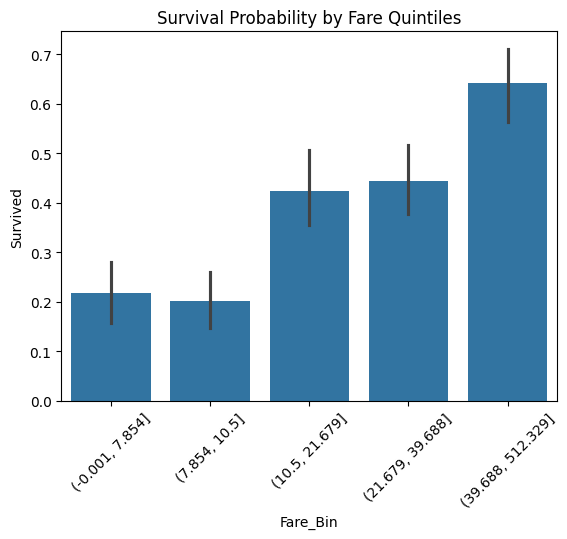

In [38]:
df["Fare_Bin"] = pd.qcut(df["Fare"], 5)

sns.barplot(data=df, x='Fare_Bin', y="Survived")
plt.xticks(rotation=45)
plt.title("Survival Probability by Fare Quintiles")

Some passengers traveled on the same ticket but weren't "Family" (e.g., nannies, friends, or cousins). The frequency of a ticket number tells you the total group size, which is often more accurate than SibSp + Parch.

Text(0.5, 1.0, 'Survival Rate by Group Size (based on Ticket Frequency)')

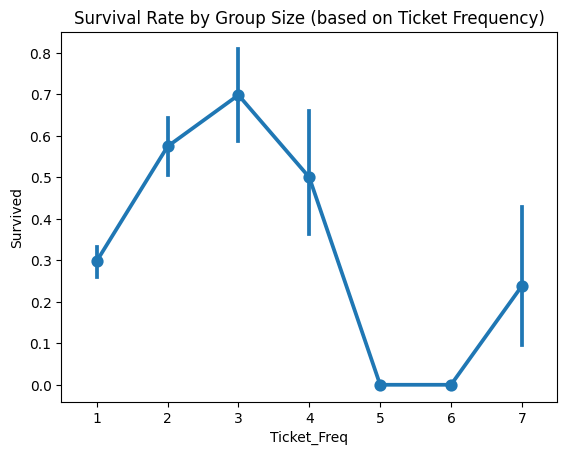

In [39]:
df["Ticket_Freq"] = df.groupby("Ticket")["Ticket"].transform('count')
sns.pointplot(data=df, x='Ticket_Freq', y='Survived')
plt.title("Survival Rate by Group Size (based on Ticket Frequency)")

Many people just fill missing Age with the median. To see if the missingness itself is a signal, check if people with "Missing Age" survived at different rates than those with "Known Age."

Text(0.5, 1.0, 'Survival Rate: Known Age vs. Missing Age')

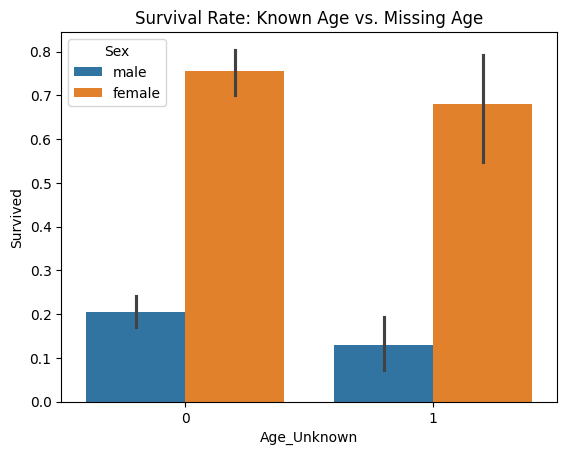

In [40]:
df["Age_Unknown"] = df["Age"].isnull().astype(int)
sns.barplot(data=df, x="Age_Unknown", y="Survived", hue="Sex")
plt.title("Survival Rate: Known Age vs. Missing Age")

To dive deeper into the relationship between categorical variables, we need to go beyond simple correlations (which only work well for numbers). We want to see if knowing one category (like Sex) gives us significant information about another (like Survival or Pclass).

**Chi-Square Test for Independence** is the gold standard for categorical association. It tells you if the relationship between two variables (e.g., Embarked and Survived) is statistically significant or just due to chance.

In [41]:
# Import necessary libraries and modules
from scipy.stats import chi2_contingency

def check_categorical_association(df, col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    print(f"Relationship between {col1} and {col2}:")
    print(f"   - Chi-square Statistics: {chi2:.4f}")
    print(f"   - P-value: {p:.4e}")
    return p

# checking if port of Embarkatioon is related to survival
check_categorical_association(df, "Embarked", "Survived")

Relationship between Embarked and Survived:
   - Chi-square Statistics: 26.4891
   - P-value: 1.7699e-06


np.float64(1.769922284120912e-06)

While Chi-Square tells you if there is a relationship, Cramer’s V tells you how strong it is (on a scale of 0 to 1). This is essentially the "correlation coefficient" for categories.

In [42]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Example: How strong is the link between Pclass and Survival?
v_score = cramers_v(df['Pclass'], df['Survived'])
print(f"Cramer's V for Pclass & Survived: {v_score:.4f}")

Cramer's V for Pclass & Survived: 0.3367


**Mutual Information (MI) Scores** is a non-linear approach used often in feature selection. It measures how much information the presence/absence of a feature contributes to making the correct prediction on the target.

In [43]:
from sklearn.feature_selection import mutual_info_classif

# We need to temporarily encode strings to numbers for MI
temp_df = df[['Pclass', 'Sex', 'Embarked', 'Survived']].copy()
temp_df['Sex'] = temp_df['Sex'].map({'male': 0, 'female': 1})
temp_df['Embarked'] = temp_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).fillna(-1)

X = temp_df.drop('Survived', axis=1)
y = temp_df['Survived']

mi_scores = mutual_info_classif(X, y, discrete_features=True)
mi_results = pd.Series(mi_scores, name="MI Scores", index=X.columns)
print(mi_results.sort_values(ascending=False))

Sex         0.150870
Pclass      0.058107
Embarked    0.016668
Name: MI Scores, dtype: float64


Sometimes a raw table is hard to read. Normalizing by index (row) shows you the likelihood of survival per category.

In [44]:
# What percentage of each Class survived?
pd.crosstab(df['Pclass'], df['Survived'], normalize='index')

# Does Sex affect the Survival Rate of different Embarked ports?
pd.crosstab(index=[df['Sex'], df['Embarked']], columns=df['Survived'], normalize='index')

Survived                0         1
Sex    Embarked                    
female C         0.123288  0.876712
       Q         0.250000  0.750000
       S         0.310345  0.689655
male   C         0.694737  0.305263
       Q         0.926829  0.073171
       S         0.825397  0.174603

<h3><b>Hands-on Feature Engineering

Creating copy of the dataset before proceeding

In [45]:
df_fe = df.copy()

In [46]:
# Quickly see the data
df_fe.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,Surname,FamilyGroup,Deck,Fare_Bin,Ticket_Freq,Age_Unknown
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mr,Braund,Braund_A/5 2117,Unknown,"(-0.001, 7.854]",1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Mrs,Cumings,Cumings_PC 1759,C,"(39.688, 512.329]",1,0


In [47]:
# Group rare titles into "Rare" for stability
rare_titles = df_fe["Title"].value_counts()
rare_titles = rare_titles[rare_titles < 10].index
df_fe["Title"] = df_fe["Title"].replace(rare_titles, "Rare")

In [48]:
df_fe["IsAlone"] = (df_fe["FamilySize"] == 1).astype(int)

In [49]:
# Deck from Cabin (first letter), missing -> "Unknown"
df_fe["Deck"] = df_fe["Cabin"].astype(str).str[0]
df_fe["Deck"] = df_fe["Deck"].replace("n", "Unknown")  # 'nan' -> 'n' after str conversion
df_fe["Deck"] = df_fe["Deck"].replace("N", "Unknown")

In [50]:
# Ticket group size (people sharing ticket sometimes correlate)
ticket_counts = df_fe["Ticket"].value_counts()
df_fe["TicketGroupSize"] = df_fe["Ticket"].map(ticket_counts)

In [51]:
# Fare per person (avoid divide-by-zero; FamilySize >= 1 always here)
df_fe["FarePerPerson"] = df_fe["Fare"] / df_fe["FamilySize"]

In [52]:
# Drop columns we won't use directly (IDs, high-cardinality, leakage-ish)
# Keep 'Name' dropped after extracting Title
drop_cols = ["PassengerId", "Name", "Cabin", "Ticket"]
df_fe = df_fe.drop(columns=drop_cols)

Let's check what we created

In [53]:
df_fe.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title,Surname,FamilyGroup,Deck,Fare_Bin,Ticket_Freq,Age_Unknown,IsAlone,TicketGroupSize,FarePerPerson
0,0,3,male,22.0,1,0,7.2500,S,2,Mr,Braund,Braund_A/5 2117,Unknown,"(-0.001, 7.854]",1,0,0,1,3.62500
1,1,1,female,38.0,1,0,71.2833,C,2,Mrs,Cumings,Cumings_PC 1759,C,"(39.688, 512.329]",1,0,0,1,35.64165
2,1,3,female,26.0,0,0,7.9250,S,1,Miss,Heikkinen,Heikkinen_STON/O2. 310128,Unknown,"(7.854, 10.5]",1,0,1,1,7.92500


<h3><b>Define Training Features (X) and Target Variable (y)

In [54]:
target_col = "Survived"

# if we drop the target column from all the features, it becomes training features
X = df_fe.drop(columns=[target_col])
# Now, as we have already defined target_col from the dataset, let's set that up
y = df_fe[target_col].astype(int)

In [55]:
# Identify column data types for pre-processing
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

Check the numerical value columns (features), just to make sure!

In [56]:
print("Numerical Features:", numerical_features)

Numerical Features: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'Ticket_Freq', 'Age_Unknown', 'IsAlone', 'TicketGroupSize', 'FarePerPerson']


Check the categorical value columns (features), just to make sure!

In [57]:
print("Categorical Features:", categorical_features)

Categorical Features: ['Sex', 'Embarked', 'Title', 'Surname', 'FamilyGroup', 'Deck', 'Fare_Bin']


<h3><b>Train / Validation Split (Stratified for Classification

In [58]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, 
                                                 random_state=RANDOM_STATE)

Checking training and validation set of the data for balance

In [59]:
print("Train:", X_train.shape, "Val:", X_val.shape)
print("Train target rate:", y_train.mean(), "Val target rate:", y_val.mean())

Train: (712, 18) Val: (179, 18)
Train target rate: 0.38342696629213485 Val target rate: 0.3854748603351955


<h3><b>Building Data Preprocessing Pipeline</b></h3>
<li> Numeric: Impute missing values + scaling the feature values
<li> Categorical: Impute missing values + one hot encoding

In [60]:
# Numeric data transformer
numeric_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy="median")), 
    ("scaler", StandardScaler())
])

# Categorical data transformer
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")), 
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Now, applying categorical and numerical data transformer to the processing step
preprocessor = ColumnTransformer(
    transformers = [
        ("num", numeric_transformer, numerical_features), 
        ("cat", categorical_transformer, categorical_features)
    ]
)

print("Data Preprocessing is Performed!✅")

Data Preprocessing is Performed!✅


<h3><b>Defining the function to evaluate any categorical machine learning model</b></h3>
This step will help us to define the function that will evaluate any classification model's performance so that we can quickly training more models and evaluate them without any issues.

In [61]:
def evaluate_classifier(model, X_tr, y_tr, X_te, y_te, model_name = "model"):
    """
    This function fits the pipeline model and prints classification metrics. 
    Also, returns a dictionary of metrics for comparison.
    """

    # Fitting training data to the model
    model.fit(X_tr, y_tr)

    # Perform predictions on the test data
    y_pred = model.predict(X_te)

    # Models like SVC output probability being True or some models can output probabilities
    y_proba = None
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_te)[:, 1]

    # ------------------------------------
    # Model evaluation metrices
    # ------------------------------------
    acc = accuracy_score(y_te, y_pred) # calculating accuracy from actual test labels against predicted test labels
    prec = precision_score(y_te, y_pred, zero_division=0)
    rec = recall_score(y_te, y_pred, zero_division=0)
    f1 = f1_score(y_te, y_pred, zero_division=0)

    # ROC AUC score calculation if probabilities exist
    auc = roc_auc_score(y_te, y_proba) if y_proba is not None else np.nan

    # printing out all the results as part of model evaluation techniques
    print(f"\n========== {model_name} ===========")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score : {f1:.4f}")
    print(f"ROC AUC: {auc:.4f}" if not np.isnan(auc) else "ROC-AUC: (No Probabilities to calculate ROC AUC)")

    # generating confusion matrix to see the True Positive, True Negative, False Positive and False Negative
    print("\nConfusioin Matrix: ")
    print(confusion_matrix(y_te, y_pred))

    # Printing classification report for entire training evaluation report
    print("\nClassification Report: ")
    print(classification_report(y_te, y_pred, zero_division=0))

    metrics = {"Model": model_name, "Accuracy": acc, "Precision": prec, "Recall": rec, "F1-Score": f1, "ROC-AUC": auc}
    return metrics
    

<h2><b>Training and Evaluating Few Baseline Models</b></h2>
It is now finally time train a few baseline models and evaluate and see how they are doing. Later steps, we will tune those models

In [62]:
# Beginning with very basic but powerful decision tree model
dt_clf = Pipeline(steps=[
    ("preprocess", preprocessor), 
    ("model", DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [63]:
# let's jump now to the RandomForest
rf_clf = Pipeline(steps=[
    ("preprocess", preprocessor), 
    ("model", RandomForestClassifier(
        random_state=RANDOM_STATE, 
        n_estimators=300
    ))
])

In [64]:
# K-Nearest Neighbors (KNN) -> This model needs scaling which is already done above in numeric pipeline
knn_clf = Pipeline(steps=[
    ("preprocess", preprocessor), 
    ("model", KNeighborsClassifier())
])

In [65]:
# Support Vector Classifier (Support ROC-AUC, enabling probability=True)
svc_clf = Pipeline(steps=[
    ("preprocess", preprocessor), 
    ("model", SVC(probability=True, random_state = RANDOM_STATE))
])

In [66]:
# Initializing empty list to store the results of model performances
results = []

In [67]:
# Appending all the results from different models to empty list "results" that we initialized above
results.append(evaluate_classifier(dt_clf, X_train, y_train, X_val, y_val, model_name="DecisionTree (Baseline)"))
results.append(evaluate_classifier(rf_clf, X_train, y_train, X_val, y_val, model_name="RandomForest (Baseline)"))
results.append(evaluate_classifier(knn_clf, X_train, y_train, X_val, y_val, model_name="KNN (Baseline)"))
results.append(evaluate_classifier(svc_clf, X_train, y_train, X_val, y_val, model_name="SVC (Baseline"))


========== DecisionTree (Baseline) ===========
Accuracy: 0.8212
Precision: 0.7761
Recall: 0.7536
F1-score : 0.7647
ROC AUC: 0.8086

Confusioin Matrix: 
[[95 15]
 [17 52]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       110
           1       0.78      0.75      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179


========== RandomForest (Baseline) ===========
Accuracy: 0.8045
Precision: 0.7931
Recall: 0.6667
F1-score : 0.7244
ROC AUC: 0.8478

Confusioin Matrix: 
[[98 12]
 [23 46]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighte

Below, I am creating a dataframe "results_df" which will take the different model results and sort by highest to lowest F1-score values so that it is easy to compare the performances of different models.

In [68]:
results_df = pd.DataFrame(results).sort_values(by="F1-Score", ascending=False)

Let's display the tabular format of the model results that we built above

In [69]:
results_df

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
3,SVC (Baseline,0.832402,0.800000,0.753623,0.776119,0.867325
0,DecisionTree (Baseline),0.821229,0.776119,0.753623,0.764706,0.808630
1,RandomForest (Baseline),0.804469,0.793103,0.666667,0.724409,0.847760
2,KNN (Baseline),0.770950,0.725806,0.652174,0.687023,0.802042


<h2><b>Hyperparameter Tuning</b></h2>
Looks like models did learn faily well, however, I think we can do even better from model's performance standpoint. 
So we will perform hyperparameter tuning individually on each of the the models and see how they are performing. 

In [70]:
# GridsearchCV with StratifiedKfold for robust evaluation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state = RANDOM_STATE)

In [71]:
# Working for decisiontree grid
dt_pipe = Pipeline(steps=[
    ("preprocess", preprocessor), 
    ("model", DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [72]:
dt_param_grid = {
    "model__max_depth": [None, 3, 5, 7, 10],
    "model__min_samples_split": [2, 5, 10, 20],
    "model__min_samples_leaf": [1, 2, 5, 10],
    "model__criterion": ["gini", "entropy", "log_loss"]
}

In [73]:
dt_grid = GridSearchCV(
    dt_pipe, dt_param_grid, scoring="f1", cv=cv, n_jobs=-1, verbose=1
)

In [74]:
dt_grid.fit(X_train, y_train)

print("Best Decision Tree Parameters:", dt_grid.best_params_)
print("Best Decision Tree CV F1:", dt_grid.best_score_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best Decision Tree Parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
Best Decision Tree CV F1: 0.7761859647018848


<h2><b>⚙️ Hyperparameter Tuning: RandomForest</b></h2>
<ul>
<li><b>n_estimators:</b> The number of trees in the forest. More is usually better, but it takes more time to train.</li>
<li><b>max_features:</b> The number of features to consider when looking for the best split.</li>
<li><b>bootstrap:</b> Whether to use the whole dataset for every tree or random subsets.</li>
</ul>

In [75]:
# 1. Define the Pipeline for RandomForest
rf_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", RandomForestClassifier(random_state=RANDOM_STATE))
])

In [76]:
# 2. Define the Parameter Grid
# We test different combinations to see which one yields the highest F1-Score
rf_param_grid = {
    "model__n_estimators": [100, 300, 500],      # Number of trees
    "model__max_depth": [None, 5, 10],           # Depth of each tree
    "model__min_samples_split": [2, 5, 10],      # Minimum samples to split a node
    "model__max_features": ["sqrt", "log2"],     # Number of features to consider at each split
    "model__bootstrap": [True, False]            # Method of selecting samples for training
}

In [77]:
# 3. Setup GridSearchCV
# n_jobs=-1 uses all your cpu cores to make the search faster
rf_grid = GridSearchCV(
    rf_pipe, 
    rf_param_grid, 
    scoring='f1', 
    cv=cv, 
    n_jobs=-1, 
    verbose=1
)

In [78]:
# 4. Fit the model to find the best combination
print("Starting RandomForest Hyperparameter Tuning🔥")
rf_grid.fit(X_train, y_train)

Starting RandomForest Hyperparameter Tuning🔥
Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Pclass',
                                                                          'Age',
                                                                          'SibSp',
                                                                          'Parch',
                                                                          'Fare',
                                                                          'FamilySize',
                                                                          'Ticket_Freq',
                                                                          'Age_Unknown',
                                                                          'IsAlone',
                                                                          'TicketGroupSize'...
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Sex',
                                                                          'Embarked',
                                                                          'Title',
                                                                          'Surname',
                                                                          'FamilyGroup',
                                                                          'Deck',
                                                                          'Fare_Bin'])])),
                                       ('model',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__bootstrap': [True, False],
                         'model__max_depth': [None, 5, 10],
                         'model__max_features': ['sqrt', 'log2'],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [100, 300, 500]},
             scoring='f1', verbose=1)

In [79]:
# 5. Output the results
print("Best RandomForest Parameters:", rf_grid.best_params_)
print("Best RandomForest CV F1-score:", round(rf_grid.best_score_, 4))

Best RandomForest Parameters: {'model__bootstrap': False, 'model__max_depth': None, 'model__max_features': 'log2', 'model__min_samples_split': 2, 'model__n_estimators': 500}
Best RandomForest CV F1-score: 0.775


<h3>⚙️ Hyperparameter Tuning: K-Nearest Neighbors (KNN)</h3>
<div style="background-color: rgba(156, 39, 176, 0.1); padding: 20px; border-radius: 10px; border-left: 5px solid #9C27B0;">
<p>KNN is a distance-based algorithm. To find the "sweet spot" between underfitting and overfitting, we tune the following parameters:</p>

<ul>
    <li><b>n_neighbors:</b> The number of neighbors to consult. A small number (like 1) makes the model sensitive to noise, while a large number can over-smooth the decision boundary.</li>
    <li><b>weights:</b> <code>uniform</code> treats all neighbors equally, while <code>distance</code> gives more weight to neighbors that are closer to the data point.</li>
    <li><b>metric:</b> Defines how distance is calculated. <code>euclidean</code> is standard straight-line distance, while <code>manhattan</code> (city-block) can sometimes be more robust in higher dimensions.</li>
</ul>
</div>

In [80]:
# Define the pipeline for KNN
knn_pipe = Pipeline(steps=[
    ("preprocess", preprocessor), 
    ("model", KNeighborsClassifier())
])

In [81]:
# Define the parameter grid
knn_param_grid = {
    "model__n_neighbors": [3, 5, 7, 9, 12, 15, 20], 
    "model__weights": ["uniform", "distance"], 
    "model__metric": ["euclidean", "manhattan"]
}

In [82]:
# Setup GridSearchCV
knn_grid = GridSearchCV(
    knn_pipe, 
    knn_param_grid, 
    scoring="f1", 
    cv=cv, 
    n_jobs=-1, 
    verbose=1
)

In [83]:
# Fit the model
print("Starting KNN Hyperparameter Tuning!")
knn_grid.fit(X_train, y_train)

Starting KNN Hyperparameter Tuning!
Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Pclass',
                                                                          'Age',
                                                                          'SibSp',
                                                                          'Parch',
                                                                          'Fare',
                                                                          'FamilySize',
                                                                          'Ticket_Freq',
                                                                          'Age_Unknown',
                                                                          'IsAlone',
                                                                          'TicketGroupSize'...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Sex',
                                                                          'Embarked',
                                                                          'Title',
                                                                          'Surname',
                                                                          'FamilyGroup',
                                                                          'Deck',
                                                                          'Fare_Bin'])])),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'model__metric': ['euclidean', 'manhattan'],
                         'model__n_neighbors': [3, 5, 7, 9, 12, 15, 20],
                         'model__weights': ['uniform', 'distance']},
             scoring='f1', verbose=1)

In [84]:
# Output the results
print("Best KNN Parameters:", knn_grid.best_params_)
print("Best KNN CV F1-Score:", round(knn_grid.best_score_, 4))

Best KNN Parameters: {'model__metric': 'manhattan', 'model__n_neighbors': 5, 'model__weights': 'distance'}
Best KNN CV F1-Score: 0.7725


💡 <b>Beginner Tip</b>: Because KNN relies on calculating the distance between points, Scaling (which we did in our numeric_transformer pipeline) is mandatory. Without it, a feature with large numbers like Fare would completely overwhelm a feature with small numbers like Age.

In [85]:
# Please check back for the next step soon..... We have more coming for hyperparameter tuning on SVC as well along with the final 
# evaluation!!

# Until then, please follow and subscribe: Data speaks YouTube channel: https://www.youtube.com/@DataSpeaks4u

https://www.youtube.com/@DataSpeaks4u

<h1><b>For submission only

Only for submission in Kaggle, not much helpful for learning!

In [86]:
import pandas as pd
import numpy as np
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import LabelEncoder

In [87]:
# 1. LOAD DATA
# 1. Load the data
train = pd.read_csv('/kaggle/input/competitions/titanic/train.csv')
test = pd.read_csv('/kaggle/input/competitions/titanic/test.csv')

passenger_ids = test['PassengerId']

In [88]:
# 2. ADVANCED FEATURE ENGINEERING
def engineer_features(df):
    # Extract Title and group rare ones
    df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
    
    # Impute Age based on Title (more accurate than global median)
    df['Age'] = df.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))
    
    # Cabin Deck extraction (First letter of Cabin)
    df['Deck'] = df['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'U') # 'U' for Unknown
    
    # Family Size & Groups
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
    
    # Fare Imputation & Binning
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())
    df['FareBin'] = pd.qcut(df['Fare'], 4, labels=[0, 1, 2, 3]).astype(int)
    
    # Cleanup
    df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)
    return df

<>:4: SyntaxWarning:

invalid escape sequence '\.'

<>:4: SyntaxWarning:

invalid escape sequence '\.'

/tmp/ipykernel_17/35656876.py:4: SyntaxWarning:

invalid escape sequence '\.'



In [89]:
train = engineer_features(train)
test = engineer_features(test)

In [90]:
# 3. ENCODING
# Use Label Encoding for categorical features
categorical = ['Sex', 'Embarked', 'Title', 'Deck']
for col in categorical:
    le = LabelEncoder()
    # Fit on combined data to ensure all labels are captured
    combined = pd.concat([train[col], test[col]], axis=0).astype(str)
    le.fit(combined)
    train[col] = le.transform(train[col].astype(str))
    test[col] = le.transform(test[col].astype(str))

In [91]:
X = train.drop('Survived', axis=1)
y = train['Survived']

print("Code executed so far!")

Code executed so far!


In [92]:
# 4. THE ENSEMBLE MODEL
# Define three strong, diverse learners
clf1 = RandomForestClassifier(n_estimators=500, max_depth=6, random_state=42)

In [93]:
clf2 = xgb.XGBClassifier(n_estimators=500, max_depth=4, learning_rate=0.01, random_state=42)

In [94]:
clf3 = lgb.LGBMClassifier(n_estimators=500, max_depth=4, learning_rate=0.01, random_state=42)

In [95]:
# Combine them using a Soft Voting Classifier
# "Soft" uses predicted probabilities rather than just "Hard" majority vote
voting_clf = VotingClassifier(
    estimators=[('rf', clf1), ('xgb', clf2), ('lgbm', clf3)],
    voting='soft'
)

In [96]:
# 5. TRAIN AND SUBMIT
voting_clf.fit(X, y)

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001453 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 252
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=6,
                                                     n_estimators=500,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weigh...
                                            learning_rate=0.01, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=4,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=500, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                             ('lgbm',
                              LGBMClassifier(learning_rate=0.01, max_depth=4,
                                             n_estimators=500,
                                             random_state=42))],
                 voting='soft')

In [97]:
predictions = voting_clf.predict(test)

In [98]:
output = pd.DataFrame({'PassengerId': passenger_ids, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Advanced submission file saved!")

Advanced submission file saved!
